In [1]:
mp_root = '/media/lsky/HDD/MP'

In [2]:
images_root = '../img/'

In [3]:
import os
import numpy as np
import torch

In [4]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
from collections import Counter

In [26]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [10]:
full_index = np.load(os.path.join(mp_root, 'index.npy'))
index_connected = np.load(os.path.join(mp_root, 'meta_derived', 'index_connected_5.0.npy'))

n_atoms = np.load(os.path.join(mp_root, 'derived_radial_cutoff_5.0', 'n_atoms.npy'))

In [121]:
i = 0
j = 0
idx_in_full = []
while i < len(full_index) and j < len(index_connected):
    if index_connected[j] == full_index[i]:
        idx_in_full.append(i)
        i += 1
        j += 1
    else:
        i += 1

idx_in_full = np.array(idx_in_full)

In [29]:
n_atoms_dict = dict(sorted(Counter(n_atoms).items()))
n_atoms_unique = np.array(list(n_atoms_dict.keys()))
n_atoms_counts = np.array(list(n_atoms_dict.values()))

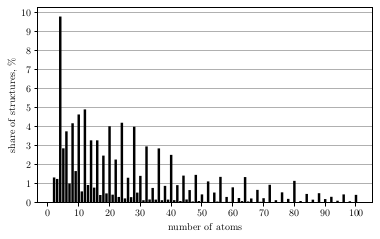

In [49]:
plt.figure(figsize=(6, 3.6))
plt.bar(n_atoms_unique[:99], n_atoms_counts[:99]*100/n_atoms_counts.sum(), color="black")
plt.ylabel("share of structures, %")
plt.xlabel("number of atoms")
plt.xticks(np.arange(100+1, step=10))
plt.yticks(np.arange(10+1))
ax = plt.gca()
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.savefig(f'{images_root}/n_atoms.pgf');

In [50]:
n_atoms_unique[-1]

444

In [40]:
n_atoms_counts[99:].sum()*100/n_atoms_counts.sum()

3.109635981393501

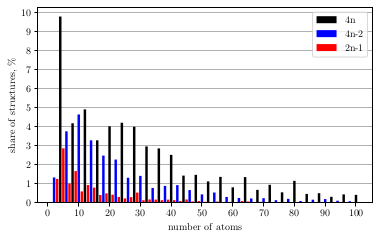

In [51]:
plt.figure(figsize=(6, 3.6))
plt.bar(n_atoms_unique[2:99:4], n_atoms_counts[2:99:4]*100/n_atoms_counts.sum(), color="black", label="4n")
plt.bar(n_atoms_unique[:99:4], n_atoms_counts[:99:4]*100/n_atoms_counts.sum(), color="blue", label="4n-2")
plt.bar(n_atoms_unique[1:99:2], n_atoms_counts[1:99:2]*100/n_atoms_counts.sum(), color="red", label="2n-1")
plt.ylabel("share of structures, %")
plt.xlabel("number of atoms")
plt.xticks(np.arange(100+1, step=10))
plt.yticks(np.arange(10+1))
ax = plt.gca()
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.legend()
plt.savefig(f'{images_root}/n_atoms_parity.pgf', transparent=True)

In [53]:
lattice_type = np.load(os.path.join(mp_root, 'derived_radial_cutoff_5.0', 'lattice_type.npy'))

In [58]:
Counter(n_atoms%2)

Counter({0: 103446, 1: 17372})

In [57]:
dict(sorted(Counter(list(zip(lattice_type, n_atoms%2))).items()))

{('cubic', 0): 14441,
 ('cubic', 1): 3241,
 ('hexagonal', 0): 9758,
 ('hexagonal', 1): 2723,
 ('monoclinic', 0): 25560,
 ('monoclinic', 1): 2422,
 ('orthorhombic', 0): 23594,
 ('orthorhombic', 1): 1283,
 ('rhombohedral', 0): 4926,
 ('rhombohedral', 1): 1536,
 ('tetragonal', 0): 11119,
 ('tetragonal', 1): 3010,
 ('triclinic', 0): 14048,
 ('triclinic', 1): 3157}

In [100]:
international_number = np.load(os.path.join(mp_root, 'derived_radial_cutoff_5.0', 'international_number.npy'))
spacegroup_symbol = np.load(os.path.join(mp_root, 'derived_radial_cutoff_5.0', 'spacegroup_symbol.npy'))

In [76]:
in_even = set(Counter(international_number[n_atoms%2 == 0]).keys())
in_odd = set(Counter(international_number[n_atoms%2 == 1]).keys())

In [84]:
print(in_even.union(in_odd).__len__())
print(in_odd.intersection(in_even).__len__())
print(in_even.difference(in_odd).__len__())
print(in_odd.difference(in_even).__len__())

227
77
149
1


In [92]:
only_even_pg = in_even.difference(in_odd)
only_even_pg_n_atoms = n_atoms[np.array([entry in only_even_pg for entry in international_number])]

In [94]:
only_even_pg_n_atoms.__len__()

53812

In [98]:
only_odd_pg = in_odd.difference(in_even)
only_odd_pg_n_atoms = n_atoms[np.array([entry in only_odd_pg for entry in international_number])]

In [99]:
only_odd_pg_n_atoms.__len__()

1

In [115]:
print(sorted(in_odd.intersection(in_even)))

[1, 2, 3, 5, 6, 8, 10, 12, 16, 21, 23, 25, 35, 38, 42, 44, 47, 65, 69, 71, 75, 79, 81, 82, 83, 87, 89, 97, 99, 107, 111, 115, 119, 121, 123, 139, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 162, 164, 166, 171, 174, 175, 177, 180, 181, 183, 187, 189, 191, 195, 196, 197, 200, 202, 204, 215, 216, 217, 221, 225, 229]


In [122]:
theoretical =  np.load(os.path.join(mp_root, 'meta', 'theoretical.npy'))
theoretical_subset = theoretical[idx_in_full]

In [126]:
n_atoms_theoretical_dict = dict(sorted(Counter(n_atoms[theoretical_subset]).items()))
n_atoms_practical_dict = dict(sorted(Counter(n_atoms[np.logical_not(theoretical_subset)]).items()))

In [143]:
n_atoms_theoretical_unique = np.array(list(n_atoms_theoretical_dict.keys()))
n_atoms_theoretical_counts = np.array(list(n_atoms_theoretical_dict.values()))

n_atoms_practical_unique = np.array(list(n_atoms_practical_dict.keys()))
n_atoms_practical_counts = np.array(list(n_atoms_practical_dict.values()))

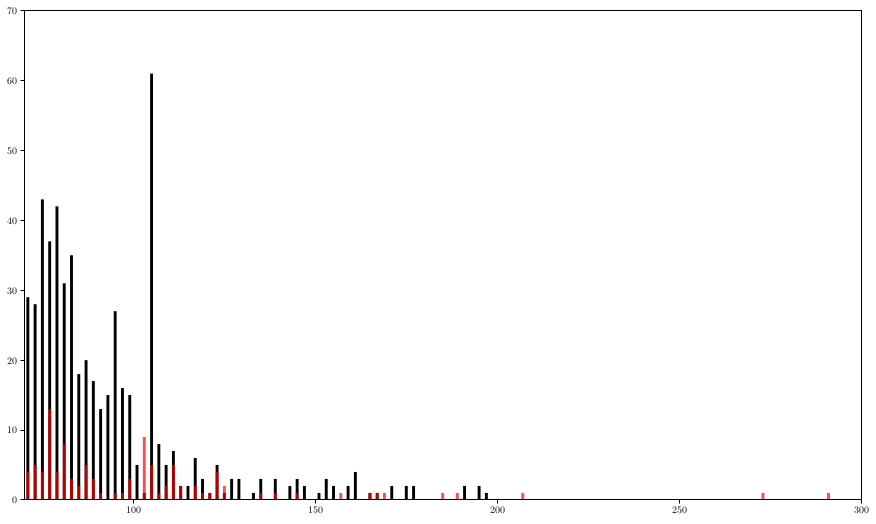

In [151]:
plt.figure(figsize=(15,9))
plt.bar(n_atoms_theoretical_unique[n_atoms_theoretical_unique%2==1], n_atoms_theoretical_counts[n_atoms_theoretical_unique%2==1], color='black');
plt.bar(n_atoms_practical_unique[n_atoms_practical_unique%2==1], n_atoms_practical_counts[n_atoms_practical_unique%2==1], color='red', alpha = 0.7);
plt.xlim((70, 300))
plt.ylim((0, 70));

In [138]:
n_atoms_theoretical_dict

{2: 749,
 3: 785,
 4: 10149,
 5: 1844,
 6: 2301,
 7: 662,
 8: 3121,
 9: 940,
 10: 3915,
 11: 365,
 12: 3447,
 13: 760,
 14: 2675,
 15: 681,
 16: 2320,
 17: 242,
 18: 1868,
 19: 421,
 20: 2939,
 21: 288,
 22: 1560,
 23: 249,
 24: 3103,
 25: 225,
 26: 1018,
 27: 238,
 28: 3072,
 29: 359,
 30: 1050,
 31: 120,
 32: 2319,
 33: 156,
 34: 597,
 35: 150,
 36: 1946,
 37: 112,
 38: 577,
 39: 141,
 40: 1849,
 41: 133,
 42: 710,
 43: 96,
 44: 931,
 45: 174,
 46: 488,
 47: 76,
 48: 927,
 49: 87,
 50: 353,
 51: 50,
 52: 718,
 53: 31,
 54: 414,
 55: 70,
 56: 979,
 57: 45,
 58: 210,
 59: 54,
 60: 471,
 61: 21,
 62: 167,
 63: 110,
 64: 1104,
 65: 82,
 66: 172,
 67: 23,
 68: 419,
 69: 58,
 70: 206,
 71: 29,
 72: 601,
 73: 28,
 74: 97,
 75: 43,
 76: 381,
 77: 37,
 78: 123,
 79: 42,
 80: 872,
 81: 31,
 82: 63,
 83: 35,
 84: 322,
 85: 18,
 86: 154,
 87: 20,
 88: 330,
 89: 17,
 90: 175,
 91: 13,
 92: 211,
 93: 15,
 94: 107,
 95: 27,
 96: 267,
 97: 16,
 98: 71,
 99: 15,
 100: 370,
 101: 5,
 102: 50,
 103: 1,

In [141]:
n_atoms_practical_dict

{2: 864,
 3: 734,
 4: 1672,
 5: 1615,
 6: 2240,
 7: 571,
 8: 1929,
 9: 1079,
 10: 1695,
 11: 365,
 12: 2481,
 13: 373,
 14: 1291,
 15: 287,
 16: 1650,
 17: 259,
 18: 1133,
 19: 180,
 20: 1920,
 21: 235,
 22: 1190,
 23: 128,
 24: 1981,
 25: 62,
 26: 577,
 27: 126,
 28: 1759,
 29: 293,
 30: 664,
 31: 50,
 32: 1264,
 33: 62,
 34: 351,
 35: 61,
 36: 1509,
 37: 59,
 38: 504,
 39: 67,
 40: 1196,
 41: 42,
 42: 418,
 43: 23,
 44: 800,
 45: 44,
 46: 324,
 47: 16,
 48: 849,
 49: 34,
 50: 188,
 51: 21,
 52: 647,
 53: 15,
 54: 241,
 55: 15,
 56: 672,
 57: 18,
 58: 168,
 59: 12,
 60: 516,
 61: 7,
 62: 143,
 63: 7,
 64: 536,
 65: 7,
 66: 110,
 67: 6,
 68: 409,
 69: 10,
 70: 91,
 71: 4,
 72: 546,
 73: 5,
 74: 72,
 75: 4,
 76: 290,
 77: 13,
 78: 132,
 79: 4,
 80: 527,
 81: 8,
 82: 58,
 83: 3,
 84: 245,
 85: 2,
 86: 49,
 87: 5,
 88: 284,
 89: 3,
 90: 68,
 91: 1,
 92: 175,
 94: 28,
 95: 1,
 96: 271,
 97: 1,
 98: 31,
 99: 3,
 100: 141,
 102: 30,
 103: 9,
 104: 202,
 105: 5,
 106: 53,
 107: 1,
 108: 184,
